# Stylometry Continued

In [86]:
import requests
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import nltk
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

In [5]:
def getAuthorTexts(author, n=10): 
    response = requests.get(f"http://corpus-db.org/api/author/{author}/fulltext")
    if response.ok:
        decoded = json.loads(response.text)
        return [t['text'] for t in decoded[:n]]

In [6]:
def getAuthorMeta(author, n=10):
    response = requests.get(f"http://corpus-db.org/api/author/{author}")
    if response.ok:
        decoded = json.loads(response.text)
        return decoded[:n]

In [8]:
def getAuthorTitles(author): 
    meta = getAuthorMeta(author)
    return [item['title'] for item in meta]

In [22]:
thoroughfare = json.loads(requests.get('http://corpus-db.org/api/id/1423.0/fulltext').text)[0]['text']

In [10]:
def getTitlesAndTexts(auth): 
    return getAuthorTitles(auth), getAuthorTexts(auth)

In [11]:
dickensTitles, dickensTexts = getTitlesAndTexts('Dickens, Charles')
collinsTitles, collinsTexts = getTitlesAndTexts('Collins, Wilkie')

In [29]:
tfidfVectorizer = TfidfVectorizer(max_features=400)

In [30]:
allTexts = dickensTexts + collinsTexts + [thoroughfare]

In [48]:
allLabels = dickensTitles + collinsTitles + ["No Thoroughfare"]

In [33]:
textMatrix = tfidfVectorizer.fit_transform(allTexts)

In [34]:
denseTextMatrix = textMatrix.todense()

In [35]:
denseTextMatrix.shape

(21, 400)

In [38]:
pca = PCA(n_components=2)

In [39]:
textPoints = pca.fit_transform(denseTextMatrix)

In [41]:
textPoints.shape

(21, 2)

In [49]:
allLabels

['A Christmas Carol in Prose; Being a Ghost Story of Christmas',
 'A Tale of Two Cities',
 'The Mystery of Edwin Drood',
 'The Pickwick Papers',
 "Master Humphrey's Clock",
 "The Haunted Man and the Ghost's Bargain",
 'Pictures from Italy',
 'The Chimes: A Goblin Story of Some Bells That Rang an Old Year out and a New Year In',
 'American Notes',
 'The Battle of Life',
 'The Moonstone',
 'The Haunted Hotel: A Mystery of Modern Venice',
 'The Woman in White',
 'No Name',
 'Man and Wife',
 'The Black Robe',
 "A Rogue's Life",
 'Miss or Mrs.?',
 'The Law and the Lady',
 'The New Magdalen',
 'No Thoroughfare']

In [51]:
textDf = pd.DataFrame(textPoints, index=allLabels, columns=['C1', 'C2'])

'bbbbbbbbbb'

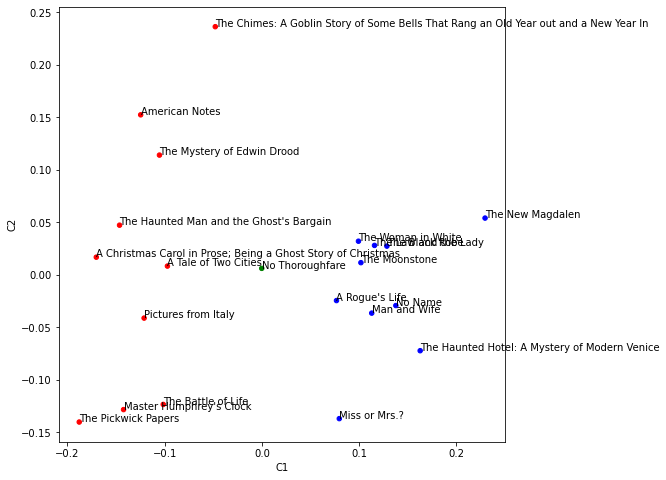

In [65]:
ax = textDf.plot(kind='scatter', x='C1', y='C2', c=list('r'*10 + 'b'*10 + 'g'), figsize=(8,8))
for title, points in textDf.iterrows():
    ax.annotate(title, points)

 - Stylometry ususally uses 100-800 MFW
 - Even the frequency of "an" can tell us a lot
 - Sometimes removing pronouns can improve the accuracy

In [ ]:
thoroughfare

In [67]:
thoroughfareTags = nltk.pos_tag(word_tokenize(thoroughfare))

In [71]:
thoroughfareNoPronouns = [(token, tag) for token, tag in thoroughfareTags if tag != 'PRP']

In [75]:
thoroughfareNoPronounsTokens = [item[0] for item in thoroughfareNoPronouns]

In [77]:
thoroughfareCounts = nltk.FreqDist(thoroughfareNoPronounsTokens)

In [88]:
textDf

,C1,C2
A Christmas Carol in Prose; Being a Ghost Story of Christmas,-0.170347,0.016733
A Tale of Two Cities,-0.097180,0.008248
The Mystery of Edwin Drood,-0.105382,0.113957
The Pickwick Papers,-0.187887,-0.140289
Master Humphrey's Clock,-0.142303,-0.128442
The Haunted Man and the Ghost's Bargain,-0.146431,0.047212
Pictures from Italy,-0.121151,-0.041288
The Chimes: A Goblin Story of Some Bells That Rang an Old Year out and a New Year In,-0.047966,0.236255
American Notes,-0.124696,0.152316
The Battle of Life,-0.101486,-0.123517


In [91]:
links = linkage(textDf, method='ward')

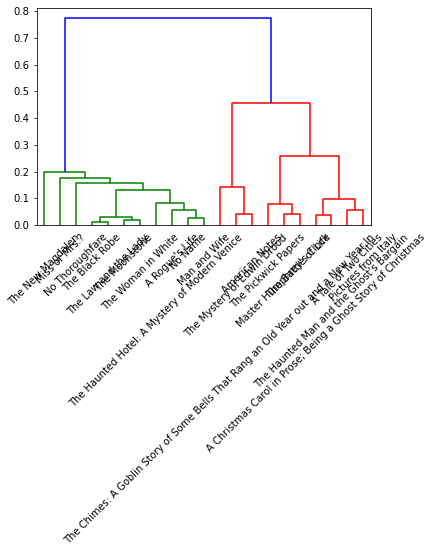

In [97]:
_ = dendrogram(links, labels=allLabels)